# Classification of Epileptical Seizures from EEG signals using Deep Learning



In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

2023-04-28 22:07:04.984820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 22:07:05.093813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-28 22:07:05.093845: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-28 22:07:05.115286: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-28 22:07:05.669411: W tensorflow/stream_executor/platform/de

# Data Preprocessing

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
X=df.values

In [4]:
X=X[:,1:-1]

In [5]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [6]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

#  Intuition of the Epileptical Signal In the Dataset 

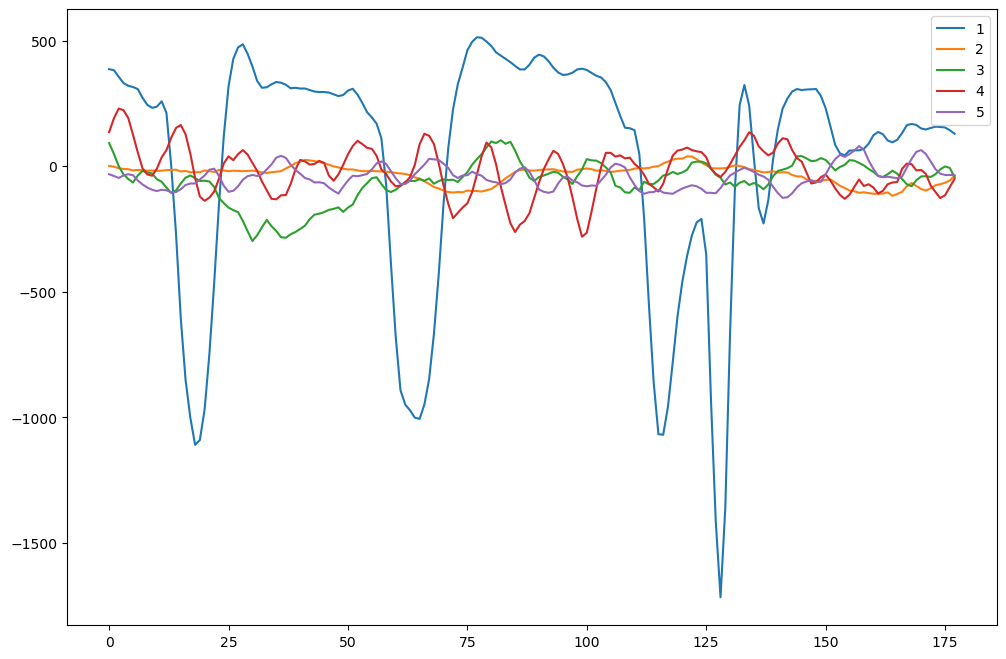

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating LSTM Neural Network For the Classification 

In [8]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

2023-04-28 22:07:07.866035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 22:07:07.866250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-28 22:07:07.866305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-28 22:07:07.866356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-28 22:07:07.866407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 56)            12992     
                                                                 
 dropout (Dropout)           (None, 45, 56)            0         
                                                                 
 lstm_1 (LSTM)               (None, 56)                25312     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense (Dense)               (None, 20)                1140      
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [11]:
hist = model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:])
                ,epochs = 50, batch_size=15,shuffle=False
                )

Epoch 1/50
614/614 [==============================] - 12s 16ms/step - loss: 0.4185 - accuracy: 0.3800 - val_loss: 0.3832 - val_accuracy: 0.4722
Epoch 2/50
614/614 [==============================] - 9s 15ms/step - loss: 0.3804 - accuracy: 0.4380 - val_loss: 0.3782 - val_accuracy: 0.4661
Epoch 3/50
614/614 [==============================] - 9s 15ms/step - loss: 0.3697 - accuracy: 0.4698 - val_loss: 0.3577 - val_accuracy: 0.4952
Epoch 4/50
614/614 [==============================] - 9s 14ms/step - loss: 0.3375 - accuracy: 0.5370 - val_loss: 0.2985 - val_accuracy: 0.6361
Epoch 5/50
614/614 [==============================] - 9s 14ms/step - loss: 0.2914 - accuracy: 0.6164 - val_loss: 0.2676 - val_accuracy: 0.6617
Epoch 6/50
614/614 [==============================] - 9s 14ms/step - loss: 0.2673 - accuracy: 0.6539 - val_loss: 0.2530 - val_accuracy: 0.6683
Epoch 7/50
614/614 [==============================] - 8s 14ms/step - loss: 0.2531 - accuracy: 0.6668 - val_loss: 0.2453 - val_accuracy: 0.677

# Saving The Trained Model

In [12]:
model.save('Epilepsy.h5')

# Visualisations

Graph Between Training Loss and Training Accuracy

KeyError: 'acc'

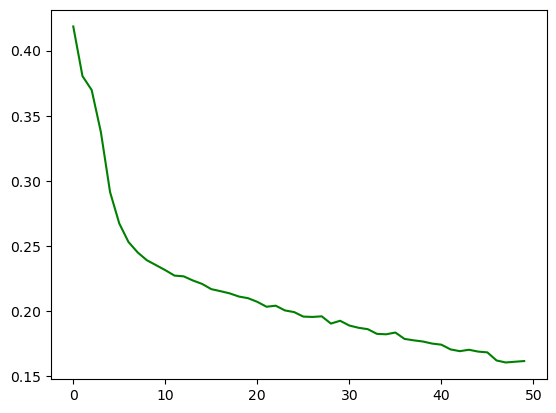

In [13]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['acc'],'r')
plt.show()

Graph Between Validation Loss Function and Validation Accuracy

In [ ]:
plt.figure(0)
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_acc'],'black')
plt.show()
